# Classification of Family Types of Protein

## Name - Artina Deka, Heramb Karil
## Roll no. - 19056 ,19139
## Department - CHE, DSE

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

In [2]:
df=pd.read_csv("protein_trn_data.csv")
df

C:\Users\91961\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (5,9,13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,structureId,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,3F6D,X-RAY DIFFRACTION,Protein,438,1.7,50637.53,"VAPOR DIFFUSION, HANGING DROP",298,1.95,36.97,"30% (w/v) PEG 4000, 0.1M Sodium Cacodylate pH ...",6.6,2010,NaN,NaN,NaN
1,4PLT,X-RAY DIFFRACTION,Protein,1324,1.6,148853.81,"VAPOR DIFFUSION, HANGING DROP",293,2.48,50.38,20mg/mL protein with 2mM NADH/L-oxamate; well ...,7.5,2014,NaN,NaN,NaN
2,2YEF,X-RAY DIFFRACTION,Protein,252,1.55,29054.37,NaN,NaN,2.03,39.29,pH 6.5,6.5,2011,NaN,NaN,NaN
3,5UJF,X-RAY DIFFRACTION,Protein,180,2.3,20674.23,"VAPOR DIFFUSION, SITTING DROP",289,2.63,52,Crystal Screen HT condition C6: 200mM Ammonium...,7.5,NaN,NaN,NaN,NaN
4,1U88,X-RAY DIFFRACTION,Protein,436,3.5,51456.98,"VAPOR DIFFUSION, SITTING DROP",297,2.7,54,"0.2M sodium citrate, 2M ammonium sulphate, pH ...",5.6,2005,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125448,5FMJ,X-RAY DIFFRACTION,Protein,192,2.43,22023.59,NaN,NaN,2.97,58.58,"0.2 M SODIUM THIOCYANATE, 20% PEG 3350",NaN,2016,NaN,NaN,NaN
125449,2YKZ,X-RAY DIFFRACTION,Protein,127,0.84,14470.12,NaN,NaN,2.74,55.19,"AMMONIUM SULPHATE, TRIS PH 7.5 .",7.5,2011,NaN,NaN,NaN
125450,2KPB,SOLUTION NMR,Protein,26,NaN,3083.67,NaN,NaN,NaN,NaN,NaN,NaN,2010,NaN,NaN,NaN
125451,4GMZ,X-RAY DIFFRACTION,Protein,613,2.05,69425.64,"VAPOR DIFFUSION, HANGING DROP",298,2.2,44.09,"22-26% PEG3350, 0.1 M HEPES, pH 7.4, 10 mM man...",7.4,2012,NaN,NaN,NaN


In [3]:
df=df.drop(['Unnamed: 13','Unnamed: 14','Unnamed: 15','publicationYear'], axis=1) 
df

,structureId,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue
0,3F6D,X-RAY DIFFRACTION,Protein,438,1.7,50637.53,"VAPOR DIFFUSION, HANGING DROP",298,1.95,36.97,"30% (w/v) PEG 4000, 0.1M Sodium Cacodylate pH ...",6.6
1,4PLT,X-RAY DIFFRACTION,Protein,1324,1.6,148853.81,"VAPOR DIFFUSION, HANGING DROP",293,2.48,50.38,20mg/mL protein with 2mM NADH/L-oxamate; well ...,7.5
2,2YEF,X-RAY DIFFRACTION,Protein,252,1.55,29054.37,NaN,NaN,2.03,39.29,pH 6.5,6.5
3,5UJF,X-RAY DIFFRACTION,Protein,180,2.3,20674.23,"VAPOR DIFFUSION, SITTING DROP",289,2.63,52,Crystal Screen HT condition C6: 200mM Ammonium...,7.5
4,1U88,X-RAY DIFFRACTION,Protein,436,3.5,51456.98,"VAPOR DIFFUSION, SITTING DROP",297,2.7,54,"0.2M sodium citrate, 2M ammonium sulphate, pH ...",5.6
...,...,...,...,...,...,...,...,...,...,...,...,...
125448,5FMJ,X-RAY DIFFRACTION,Protein,192,2.43,22023.59,NaN,NaN,2.97,58.58,"0.2 M SODIUM THIOCYANATE, 20% PEG 3350",NaN
125449,2YKZ,X-RAY DIFFRACTION,Protein,127,0.84,14470.12,NaN,NaN,2.74,55.19,"AMMONIUM SULPHATE, TRIS PH 7.5 .",7.5
125450,2KPB,SOLUTION NMR,Protein,26,NaN,3083.67,NaN,NaN,NaN,NaN,NaN,NaN
125451,4GMZ,X-RAY DIFFRACTION,Protein,613,2.05,69425.64,"VAPOR DIFFUSION, HANGING DROP",298,2.2,44.09,"22-26% PEG3350, 0.1 M HEPES, pH 7.4, 10 mM man...",7.4


In [4]:
df.shape

(125453, 12)

In [5]:
df.isnull().sum()

structureId                     0
experimentalTechnique           0
macromoleculeType            3178
residueCount                  125
resolution                  10491
structureMolecularWeight      729
crystallizationMethod       38583
crystallizationTempK        39094
densityMatthews             14872
densityPercentSol           14643
pdbxDetails                 19947
phValue                     31744
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125453 entries, 0 to 125452
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   structureId               125453 non-null  object
 1   experimentalTechnique     125453 non-null  object
 2   macromoleculeType         122275 non-null  object
 3   residueCount              125328 non-null  object
 4   resolution                114962 non-null  object
 5   structureMolecularWeight  124724 non-null  object
 6   crystallizationMethod     86870 non-null   object
 7   crystallizationTempK      86359 non-null   object
 8   densityMatthews           110581 non-null  object
 9   densityPercentSol         110810 non-null  object
 10  pdbxDetails               105506 non-null  object
 11  phValue                   93709 non-null   object
dtypes: object(12)
memory usage: 11.5+ MB


In [7]:
df=df.drop(['structureId'], axis=1) 

In [8]:
df.describe()

,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue
count,125453,122275,125328,114962,124724.00,86870,86359,110581,110810.0,105506,93709
unique,4751,52,4523,1764,115005.00,5039,279,714,10938.0,80852,3739
top,X-RAY DIFFRACTION,Protein,Protein,2,33813.86,"VAPOR DIFFUSION, HANGING DROP",293,2.2,50.0,pH 7.5,7.5
freq,108302,109134,4312,6527,171.00,46232,23606,1656,307.0,309,13105


In [9]:
df2_cl=pd.read_csv("protein_trn_class_labels.csv",header=None)
df2_cl[1] = pd.factorize(df2_cl[1])[0]

In [10]:
print(df2_cl[1].nunique())

2160


In [11]:
df['exp_tech'] = pd.factorize(df['experimentalTechnique'])[0]
df['macro_Type'] = pd.factorize(df['macromoleculeType'])[0]
df['cry_Meth'] = pd.factorize(df['crystallizationMethod'])[0]
df['pdbx_Det'] = pd.factorize(df['pdbxDetails'])[0]
print(df)

       experimentalTechnique macromoleculeType residueCount resolution  \
0          X-RAY DIFFRACTION           Protein          438        1.7   
1          X-RAY DIFFRACTION           Protein         1324        1.6   
2          X-RAY DIFFRACTION           Protein          252       1.55   
3          X-RAY DIFFRACTION           Protein          180        2.3   
4          X-RAY DIFFRACTION           Protein          436        3.5   
...                      ...               ...          ...        ...   
125448     X-RAY DIFFRACTION           Protein          192       2.43   
125449     X-RAY DIFFRACTION           Protein          127       0.84   
125450          SOLUTION NMR           Protein           26        NaN   
125451     X-RAY DIFFRACTION           Protein          613       2.05   
125452          SOLUTION NMR           Protein          113        NaN   

       structureMolecularWeight          crystallizationMethod  \
0                      50637.53  VAPOR DIFFUS

In [12]:
df=df.drop(['experimentalTechnique','macromoleculeType','crystallizationMethod','pdbxDetails'],axis =1)
print(df)

       residueCount resolution structureMolecularWeight crystallizationTempK  \
0               438        1.7                 50637.53                  298   
1              1324        1.6                148853.81                  293   
2               252       1.55                 29054.37                  NaN   
3               180        2.3                 20674.23                  289   
4               436        3.5                 51456.98                  297   
...             ...        ...                      ...                  ...   
125448          192       2.43                 22023.59                  NaN   
125449          127       0.84                 14470.12                  NaN   
125450           26        NaN                  3083.67                  NaN   
125451          613       2.05                 69425.64                  298   
125452          113        NaN                 12256.59                  NaN   

       densityMatthews densityPercentSo

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125453 entries, 0 to 125452
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   residueCount              125328 non-null  object
 1   resolution                114962 non-null  object
 2   structureMolecularWeight  124724 non-null  object
 3   crystallizationTempK      86359 non-null   object
 4   densityMatthews           110581 non-null  object
 5   densityPercentSol         110810 non-null  object
 6   phValue                   93709 non-null   object
 7   exp_tech                  125453 non-null  int64 
 8   macro_Type                125453 non-null  int64 
 9   cry_Meth                  125453 non-null  int64 
 10  pdbx_Det                  125453 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 10.5+ MB


# Filling Null values with mean

In [14]:
df['resolution'] = pd.to_numeric(df['resolution'], errors='coerce')
df["resolution"] = df["resolution"].fillna(value=df["resolution"].mean())

In [15]:
df['residueCount'] = pd.to_numeric(df['residueCount'], errors='coerce')
df["residueCount"] = df["residueCount"].fillna(value=df["residueCount"].mean())

In [16]:
df['structureMolecularWeight'] = pd.to_numeric(df['structureMolecularWeight'], errors='coerce')
df["structureMolecularWeight"] = df["structureMolecularWeight"].fillna(value=df["structureMolecularWeight"].mean())

In [17]:
df['crystallizationTempK'] = pd.to_numeric(df['crystallizationTempK'], errors='coerce')
df["crystallizationTempK"] = df["crystallizationTempK"].fillna(value=df["crystallizationTempK"].mean())

In [18]:
df['densityMatthews'] = pd.to_numeric(df['densityMatthews'], errors='coerce')
df["densityMatthews"] = df["densityMatthews"].fillna(value=df["densityMatthews"].mean())

In [19]:
df['densityPercentSol'] = pd.to_numeric(df['densityPercentSol'], errors='coerce')
df["densityPercentSol"] = df["densityPercentSol"].fillna(value=df["densityPercentSol"].mean())

In [20]:
df['phValue'] = pd.to_numeric(df['phValue'], errors='coerce')
df["phValue"] = df["phValue"].fillna(value=df["phValue"].mean())

In [21]:
df.isnull().sum()

residueCount                0
resolution                  0
structureMolecularWeight    0
crystallizationTempK        0
densityMatthews             0
densityPercentSol           0
phValue                     0
exp_tech                    0
macro_Type                  0
cry_Meth                    0
pdbx_Det                    0
dtype: int64

# Feature selecion

In [22]:
corrMatrix = df.corr()
print (corrMatrix)

                          residueCount  resolution  structureMolecularWeight  \
residueCount                  1.000000   -0.001345                  0.536324   
resolution                   -0.001345    1.000000                 -0.019863   
structureMolecularWeight      0.536324   -0.019863                  1.000000   
crystallizationTempK          0.000056    0.001087                 -0.001669   
densityMatthews               0.000688    0.063706                 -0.003216   
densityPercentSol             0.082305   -0.353629                  0.067467   
phValue                       0.007092    0.000404                  0.004374   
exp_tech                      0.000102    0.464049                 -0.027100   
macro_Type                   -0.002497    0.288489                 -0.011727   
cry_Meth                     -0.000402    0.447539                 -0.025979   
pdbx_Det                     -0.037740   -0.009448                 -0.024534   

                          crystallizati

In [23]:
df.var()

residueCount                4.584945e+06
resolution                  4.948918e+04
structureMolecularWeight    3.495642e+11
crystallizationTempK        4.677886e+06
densityMatthews             1.692747e+05
densityPercentSol           1.651601e+02
phValue                     5.536693e+00
exp_tech                    2.776536e+05
macro_Type                  1.772840e+00
cry_Meth                    3.406012e+05
pdbx_Det                    6.584404e+08
dtype: float64

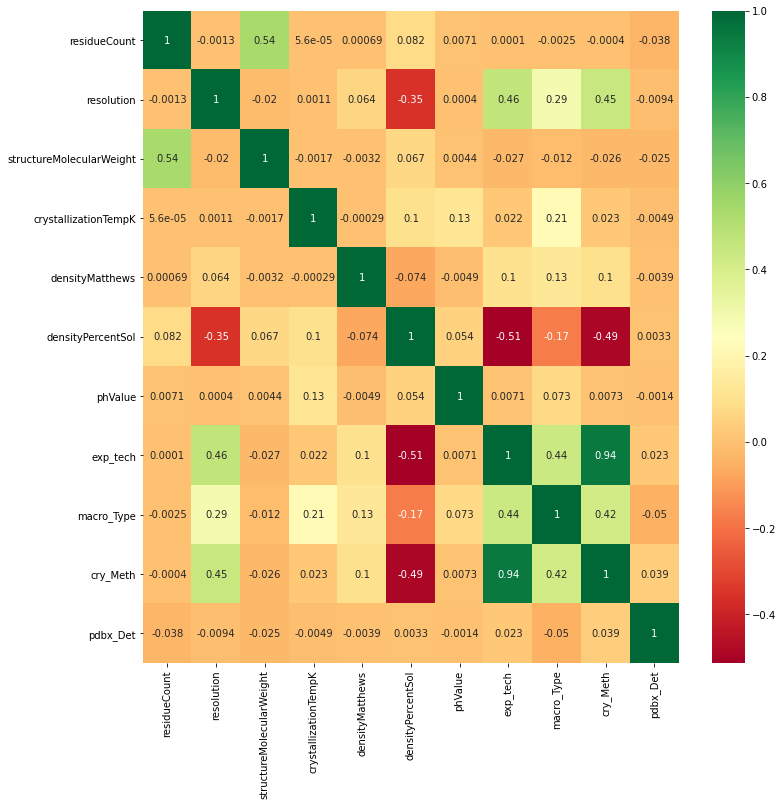

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

top_corr_features = corrMatrix.index
plt.figure(figsize=(12,12))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [25]:
df1=df.drop(['exp_tech','densityPercentSol'],axis=1)                 
print(df1)

        residueCount  resolution  structureMolecularWeight  \
0              438.0    1.700000                  50637.53   
1             1324.0    1.600000                 148853.81   
2              252.0    1.550000                  29054.37   
3              180.0    2.300000                  20674.23   
4              436.0    3.500000                  51456.98   
...              ...         ...                       ...   
125448         192.0    2.430000                  22023.59   
125449         127.0    0.840000                  14470.12   
125450          26.0   28.081029                   3083.67   
125451         613.0    2.050000                  69425.64   
125452         113.0   28.081029                  12256.59   

        crystallizationTempK  densityMatthews   phValue  macro_Type  cry_Meth  \
0                 298.000000         1.950000  6.600000           0         0   
1                 293.000000         2.480000  7.500000           0         0   
2           

Feature: 0, Score: 0.00947
Feature: 1, Score: 0.10351
Feature: 2, Score: 0.08455
Feature: 3, Score: 0.04753
Feature: 4, Score: 0.11648
Feature: 5, Score: 0.10656
Feature: 6, Score: 0.13612
Feature: 7, Score: 0.03271
Feature: 8, Score: 0.06460
Feature: 9, Score: 0.28895
Feature: 10, Score: 0.00952


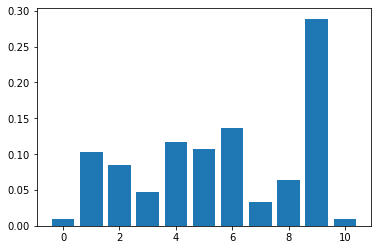

In [26]:
# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from matplotlib import pyplot
# define dataset 
X = df
y = df2_cl[1]
X, y = make_classification(n_samples=125453, n_features=11,n_informative=7,random_state=1)
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [27]:
df2=df.drop(['residueCount','crystallizationTempK','exp_tech','pdbx_Det'],axis=1)                 
print(df2)

        resolution  structureMolecularWeight  densityMatthews  \
0         1.700000                  50637.53         1.950000   
1         1.600000                 148853.81         2.480000   
2         1.550000                  29054.37         2.030000   
3         2.300000                  20674.23         2.630000   
4         3.500000                  51456.98         2.700000   
...            ...                       ...              ...   
125448    2.430000                  22023.59         2.970000   
125449    0.840000                  14470.12         2.740000   
125450   28.081029                   3083.67        14.057693   
125451    2.050000                  69425.64         2.200000   
125452   28.081029                  12256.59        14.057693   

        densityPercentSol   phValue  macro_Type  cry_Meth  
0               36.970000  6.600000           0         0  
1               50.380000  7.500000           0         0  
2               39.290000  6.500000    

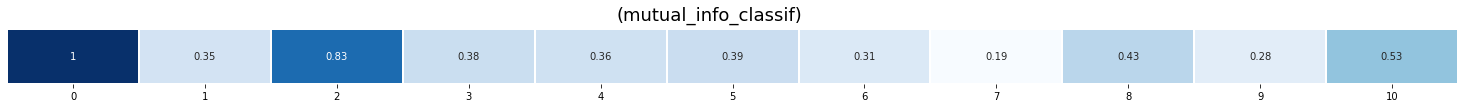

In [28]:
from sklearn.feature_selection import mutual_info_classif
X=df
y=df2_cl[1]
mutual_information = mutual_info_classif(X,y)

plt.subplots(1, figsize=(26, 1))
sns.heatmap(mutual_information[:, np.newaxis].T, cmap='Blues', cbar=False, linewidths=1, annot=True)
plt.yticks([], [])
plt.suptitle("(mutual_info_classif)", fontsize=18, y=1.2)
plt.gcf().subplots_adjust(wspace=0.2)
pass

In [29]:
df3=df.drop(['phValue','exp_tech','cry_Meth'],axis=1)                 
print(df3)

        residueCount  resolution  structureMolecularWeight  \
0              438.0    1.700000                  50637.53   
1             1324.0    1.600000                 148853.81   
2              252.0    1.550000                  29054.37   
3              180.0    2.300000                  20674.23   
4              436.0    3.500000                  51456.98   
...              ...         ...                       ...   
125448         192.0    2.430000                  22023.59   
125449         127.0    0.840000                  14470.12   
125450          26.0   28.081029                   3083.67   
125451         613.0    2.050000                  69425.64   
125452         113.0   28.081029                  12256.59   

        crystallizationTempK  densityMatthews  densityPercentSol  macro_Type  \
0                 298.000000         1.950000          36.970000           0   
1                 293.000000         2.480000          50.380000           0   
2              

# For data df2

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X=df2
y=df2_cl[1]

In [31]:
scaler = StandardScaler().fit(X)
X_norm =  scaler.transform(X)
X_scaled = pd.DataFrame(X_norm, columns=X.columns)
X_scaled.shape

(125453, 7)

In [32]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
scaler = StandardScaler().fit(X_train)
X_train_norm =  scaler.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_norm, columns=X.columns)
X_train_scaled.head()

,resolution,structureMolecularWeight,densityMatthews,densityPercentSol,phValue,macro_Type,cry_Meth
0,-0.115575,-0.149223,-0.026276,-0.217344,0.077290,-0.234218,-0.185320
1,-0.115348,-0.145150,-0.023750,1.161980,0.663773,-0.234218,-0.185320
2,-0.115575,0.045371,-0.025340,0.417114,0.000002,-0.234218,-0.188744
3,-0.115122,-0.041358,-0.026537,-0.443603,0.663773,-0.234218,-0.187032
4,-0.118517,-0.028844,-0.025797,0.132541,-0.118205,-0.234218,-0.188744


In [34]:
X_test_norm = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_norm, columns=X.columns)
X_test_scaled.head()

,resolution,structureMolecularWeight,densityMatthews,densityPercentSol,phValue,macro_Type,cry_Meth
0,-0.117973,-0.125210,-0.027212,-1.177583,-0.861084,-0.234218,-0.185320
1,-0.115575,0.032872,-0.024273,0.954382,0.272784,-0.234218,-0.187032
2,-0.095614,0.472288,-0.022967,1.420117,0.000002,-0.234218,-0.188744
3,-0.113764,-0.073354,-0.025253,0.479316,0.272784,-0.234218,-0.188744
4,-0.116480,0.165328,-0.025819,0.090555,-0.118205,-0.234218,-0.187032


In [35]:
#Random Forest with singal train-test split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

m = RandomForestClassifier(n_estimators=40, min_samples_leaf=3, n_jobs=-1)
m.fit(X_train, y_train)
predictions = m.predict(X_test)

print(classification_report(y_test, predictions))
print("Accuracy :",accuracy_score(y_test, predictions),'\n')
#This is the best accuracy we found out after doing tuning manualy

              precision    recall  f1-score   support

           0       0.27      0.52      0.36      2812
           1       0.37      0.47      0.41      2266
           2       0.50      0.20      0.29       225
           4       0.61      0.13      0.21       454
           5       0.39      0.19      0.26       355
           6       0.24      0.14      0.17       565
           7       0.00      0.00      0.00         5
           8       0.80      0.67      0.73         6
           9       1.00      1.00      1.00         2
          10       0.55      0.11      0.19       384
          11       0.30      0.22      0.25       712
          12       0.17      0.03      0.06       207
          13       0.14      0.08      0.10       365
          14       0.83      0.23      0.36        43
          15       0.37      0.54      0.43        84
          16       0.29      0.64      0.40      3762
          17       0.35      0.21      0.27       626
          18       0.30    

C:\Users\91961\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91961\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91961\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91961\anaconda3\lib\site-packages\sklearn\metrics\_cla

In [36]:
# Decision tree with singal train-test split
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=50)
dtree.fit(X_train, y_train)

predictions = dtree.predict(X_test)
print(classification_report(y_test, predictions))
print("Accuracy :",accuracy_score(y_test, predictions),'\n')
#This is the best accuracy we found out after doing tuning manualy

              precision    recall  f1-score   support

           0       0.31      0.32      0.31      2812
           1       0.38      0.37      0.37      2266
           2       0.18      0.16      0.17       225
           3       0.00      0.00      0.00         0
           4       0.18      0.19      0.19       454
           5       0.18      0.19      0.18       355
           6       0.15      0.16      0.16       565
           7       0.33      0.20      0.25         5
           8       0.29      0.33      0.31         6
           9       0.67      1.00      0.80         2
          10       0.15      0.16      0.16       384
          11       0.19      0.21      0.20       712
          12       0.04      0.05      0.05       207
          13       0.10      0.09      0.09       365
          14       0.28      0.23      0.25        43
          15       0.41      0.40      0.41        84
          16       0.40      0.40      0.40      3762
          17       0.21    

C:\Users\91961\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91961\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91961\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91961\anaconda3\lib\site-packages\sklearn\metrics\_cla

In [37]:
# Gaussian Naive Bayes with singal train-test split
from sklearn.naive_bayes import GaussianNB
m = GaussianNB(var_smoothing=2e11)
m.fit(X_train, y_train)
predictions = m.predict(X_test)
print(classification_report(y_test, predictions))
print("Accuracy :",accuracy_score(y_test, predictions),'\n')
#This is the best accuracy we found out after doing tuning manualy

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2812
           1       0.00      0.00      0.00      2266
           2       0.00      0.00      0.00       225
           4       0.00      0.00      0.00       454
           5       0.00      0.00      0.00       355
           6       0.00      0.00      0.00       565
           7       0.00      0.00      0.00         5
           8       0.00      0.00      0.00         6
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00       384
          11       0.00      0.00      0.00       712
          12       0.00      0.00      0.00       207
          13       0.00      0.00      0.00       365
          14       0.00      0.00      0.00        43
          15       0.00      0.00      0.00        84
          16       0.15      1.00      0.26      3762
          17       0.00      0.00      0.00       626
          18       0.00    

C:\Users\91961\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91961\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91961\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
#multinomialNB
from sklearn.naive_bayes import MultinomialNB
m = MultinomialNB(alpha=0.6)
m.fit(X_train, y_train)
predictions = m.predict(X_test)
print(classification_report(y_test, predictions))
print("Accuracy :",accuracy_score(y_test, predictions),'\n')
#This is the best accuracy we found out after doing tuning manualy

ValueError: Negative values in data passed to MultinomialNB (input X)

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train_scaled, y_train)
predictions = knn.predict(X_test_scaled)
print(classification_report(y_test, predictions))
print("Accuracy :",accuracy_score(y_test, predictions),'\n')
#This is the best accuracy we found out after doing tuning manualy

# For other data (df1)

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X=df1
y=df2_cl[1]

In [40]:
scaler = StandardScaler().fit(X)
X_norm =  scaler.transform(X)
X_scaled = pd.DataFrame(X_norm, columns=X.columns)
X_scaled.shape

(125453, 9)

In [41]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
scaler = StandardScaler().fit(X_train)
X_train_norm =  scaler.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_norm, columns=X.columns)
X_train_scaled.head()

,residueCount,resolution,structureMolecularWeight,crystallizationTempK,densityMatthews,phValue,macro_Type,cry_Meth,pdbx_Det
0,-0.300973,-0.115575,-0.149223,-0.019091,-0.026276,0.077290,-0.234218,-0.185320,1.402741
1,-0.292876,-0.115348,-0.145150,-0.027703,-0.023750,0.663773,-0.234218,-0.185320,-0.236216
2,0.172281,-0.115575,0.045371,0.004263,-0.025340,0.000002,-0.234218,-0.188744,-0.548413
3,-0.031056,-0.115122,-0.041358,-0.016220,-0.026537,0.663773,-0.234218,-0.187032,-0.062124
4,-0.000016,-0.118517,-0.028844,-0.027703,-0.025797,-0.118205,-0.234218,-0.188744,1.208202


In [43]:
X_test_norm = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_norm, columns=X.columns)
X_test_scaled.head()

,residueCount,resolution,structureMolecularWeight,crystallizationTempK,densityMatthews,phValue,macro_Type,cry_Meth,pdbx_Det
0,-0.228096,-0.117973,-0.125210,-0.018373,-0.027212,-0.861084,-0.234218,-0.185320,-1.059628
1,0.138092,-0.115575,0.032872,-0.027703,-0.024273,0.272784,-0.234218,-0.187032,-0.466780
2,1.221358,-0.095614,0.472288,0.004263,-0.022967,0.000002,-0.234218,-0.188744,-1.136158
3,-0.121029,-0.113764,-0.073354,0.004263,-0.025253,0.272784,-0.234218,-0.188744,-1.107493
4,0.501580,-0.116480,0.165328,-0.012632,-0.025819,-0.118205,-0.234218,-0.187032,1.945542


In [44]:
#Random Forest with singal train-test split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

m = RandomForestClassifier(n_estimators=50, min_samples_leaf=3, n_jobs=-1)
m.fit(X_train, y_train)
predictions = m.predict(X_test)

print(classification_report(y_test, predictions))
print("Accuracy :",accuracy_score(y_test, predictions),'\n')
#This is the best accuracy we found out after doing tuning manualy

              precision    recall  f1-score   support

           0       0.33      0.60      0.42      2812
           1       0.44      0.57      0.49      2266
           2       0.60      0.24      0.34       225
           4       0.62      0.22      0.32       454
           5       0.43      0.26      0.32       355
           6       0.30      0.19      0.23       565
           7       0.50      0.40      0.44         5
           8       0.80      0.67      0.73         6
           9       1.00      1.00      1.00         2
          10       0.69      0.19      0.30       384
          11       0.43      0.41      0.42       712
          12       0.27      0.07      0.11       207
          13       0.26      0.13      0.17       365
          14       0.80      0.28      0.41        43
          15       0.40      0.63      0.49        84
          16       0.35      0.69      0.46      3762
          17       0.43      0.29      0.35       626
          18       0.37    

C:\Users\91961\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91961\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91961\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91961\anaconda3\lib\site-packages\sklearn\metrics\_cla

In [45]:
# Decision tree with singal train-test split
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=50,min_samples_leaf=20, criterion="entropy")
dtree.fit(X_train, y_train)

predictions = dtree.predict(X_test)
print(classification_report(y_test, predictions))
print("Accuracy :",accuracy_score(y_test, predictions),'\n')

              precision    recall  f1-score   support

           0       0.25      0.45      0.32      2812
           1       0.30      0.43      0.36      2266
           2       0.26      0.18      0.22       225
           4       0.17      0.14      0.15       454
           5       0.19      0.15      0.17       355
           6       0.15      0.13      0.14       565
           7       0.29      0.40      0.33         5
           8       0.33      0.33      0.33         6
           9       0.00      0.00      0.00         2
          10       0.23      0.12      0.15       384
          11       0.30      0.31      0.31       712
          12       0.11      0.03      0.05       207
          13       0.12      0.08      0.10       365
          14       0.39      0.30      0.34        43
          15       0.26      0.60      0.36        84
          16       0.32      0.51      0.40      3762
          17       0.21      0.15      0.17       626
          18       0.21    

C:\Users\91961\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91961\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91961\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91961\anaconda3\lib\site-packages\sklearn\metrics\_cla

In [46]:
# Decision tree with singal train-test split
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=50, criterion="entropy")
dtree.fit(X_train, y_train)

predictions = dtree.predict(X_test)
print(classification_report(y_test, predictions))
print("Accuracy :",accuracy_score(y_test, predictions),'\n')
#This is the best accuracy we found out after doing tuning manualy

              precision    recall  f1-score   support

           0       0.39      0.40      0.40      2812
           1       0.45      0.46      0.45      2266
           2       0.24      0.26      0.25       225
           4       0.28      0.27      0.28       454
           5       0.24      0.24      0.24       355
           6       0.20      0.20      0.20       565
           7       0.50      0.40      0.44         5
           8       0.50      0.67      0.57         6
           9       1.00      0.50      0.67         2
          10       0.25      0.26      0.25       384
          11       0.29      0.29      0.29       712
          12       0.09      0.08      0.09       207
          13       0.18      0.16      0.17       365
          14       0.45      0.40      0.42        43
          15       0.40      0.48      0.43        84
          16       0.46      0.46      0.46      3762
          17       0.31      0.30      0.31       626
          18       0.18    

C:\Users\91961\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91961\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91961\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91961\anaconda3\lib\site-packages\sklearn\metrics\_cla

In [47]:
# Gaussian Naive Bayes with singal train-test split
from sklearn.naive_bayes import GaussianNB
m = GaussianNB(var_smoothing=2e9)
m.fit(X_train, y_train)
predictions = m.predict(X_test)
#print(classification_report(y_test, predictions))
print("Accuracy :",accuracy_score(y_test, predictions),'\n')
#This is the best accuracy we found out after doing tuning manualy

Accuracy : 0.14993423936869793 



In [48]:
from sklearn.naive_bayes import MultinomialNB
m = MultinomialNB(alpha=0.6)
m.fit(X_train, y_train)
predictions = m.predict(X_test)
print(classification_report(y_test, predictions))
print("Accuracy :",accuracy_score(y_test, predictions),'\n')
#This is the best accuracy we found out after doing tuning manualy

ValueError: Negative values in data passed to MultinomialNB (input X)

In [49]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_scaled, y_train)
predictions = knn.predict(X_test_scaled)
print(classification_report(y_test, predictions))
print("Accuracy :",accuracy_score(y_test, predictions),'\n')
#This is the best accuracy we found out after doing tuning manualy

              precision    recall  f1-score   support

           0       0.35      0.36      0.35      2812
           1       0.36      0.38      0.37      2266
           2       0.26      0.24      0.25       225
           4       0.20      0.21      0.21       454
           5       0.19      0.17      0.18       355
           6       0.16      0.15      0.16       565
           7       0.50      0.40      0.44         5
           8       0.29      0.67      0.40         6
           9       0.67      1.00      0.80         2
          10       0.20      0.20      0.20       384
          11       0.19      0.18      0.19       712
          12       0.09      0.09      0.09       207
          13       0.14      0.14      0.14       365
          14       0.20      0.19      0.19        43
          15       0.37      0.42      0.39        84
          16       0.41      0.42      0.41      3762
          17       0.26      0.26      0.26       626
          18       0.17    

C:\Users\91961\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91961\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91961\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91961\anaconda3\lib\site-packages\sklearn\metrics\_cla

# For other Data (df3)

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X=df3
y=df2_cl[1]

In [51]:
scaler = StandardScaler().fit(X)
X_norm =  scaler.transform(X)
X_scaled = pd.DataFrame(X_norm, columns=X.columns)
X_scaled.shape

(125453, 8)

In [52]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
scaler = StandardScaler().fit(X_train)
X_train_norm =  scaler.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_norm, columns=X.columns)
X_train_scaled.head()

,residueCount,resolution,structureMolecularWeight,crystallizationTempK,densityMatthews,densityPercentSol,macro_Type,pdbx_Det
0,-0.300973,-0.115575,-0.149223,-0.019091,-0.026276,-0.217344,-0.234218,1.402741
1,-0.292876,-0.115348,-0.145150,-0.027703,-0.023750,1.161980,-0.234218,-0.236216
2,0.172281,-0.115575,0.045371,0.004263,-0.025340,0.417114,-0.234218,-0.548413
3,-0.031056,-0.115122,-0.041358,-0.016220,-0.026537,-0.443603,-0.234218,-0.062124
4,-0.000016,-0.118517,-0.028844,-0.027703,-0.025797,0.132541,-0.234218,1.208202


In [54]:
X_test_norm = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_norm, columns=X.columns)
X_test_scaled.head()

,residueCount,resolution,structureMolecularWeight,crystallizationTempK,densityMatthews,densityPercentSol,macro_Type,pdbx_Det
0,-0.228096,-0.117973,-0.125210,-0.018373,-0.027212,-1.177583,-0.234218,-1.059628
1,0.138092,-0.115575,0.032872,-0.027703,-0.024273,0.954382,-0.234218,-0.466780
2,1.221358,-0.095614,0.472288,0.004263,-0.022967,1.420117,-0.234218,-1.136158
3,-0.121029,-0.113764,-0.073354,0.004263,-0.025253,0.479316,-0.234218,-1.107493
4,0.501580,-0.116480,0.165328,-0.012632,-0.025819,0.090555,-0.234218,1.945542


In [55]:
#Random Forest with singal train-test split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

m = RandomForestClassifier(n_estimators=40,min_samples_leaf=3, n_jobs=-1)
m.fit(X_train, y_train)
predictions = m.predict(X_test)

print(classification_report(y_test, predictions))
print("Accuracy :",accuracy_score(y_test, predictions),'\n')
#This is the best accuracy we found out after doing tuning manualy

              precision    recall  f1-score   support

           0       0.31      0.56      0.40      2812
           1       0.39      0.53      0.45      2266
           2       0.57      0.22      0.32       225
           4       0.50      0.16      0.24       454
           5       0.35      0.19      0.25       355
           6       0.24      0.15      0.18       565
           7       0.33      0.20      0.25         5
           8       0.80      0.67      0.73         6
           9       1.00      1.00      1.00         2
          10       0.60      0.15      0.24       384
          11       0.41      0.35      0.38       712
          12       0.22      0.05      0.09       207
          13       0.16      0.09      0.12       365
          14       0.77      0.23      0.36        43
          15       0.35      0.49      0.41        84
          16       0.32      0.66      0.43      3762
          17       0.39      0.25      0.30       626
          18       0.26    

C:\Users\91961\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91961\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91961\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91961\anaconda3\lib\site-packages\sklearn\metrics\_cla

In [56]:
# Decision tree with singal train-test split
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=50,min_samples_leaf=20, criterion="entropy")
dtree.fit(X_train, y_train)

predictions = dtree.predict(X_test)
print(classification_report(y_test, predictions))
print("Accuracy :",accuracy_score(y_test, predictions),'\n')

              precision    recall  f1-score   support

           0       0.25      0.45      0.32      2812
           1       0.30      0.43      0.35      2266
           2       0.27      0.16      0.20       225
           4       0.17      0.16      0.17       454
           5       0.15      0.14      0.14       355
           6       0.15      0.14      0.14       565
           7       0.29      0.40      0.33         5
           8       0.33      0.33      0.33         6
           9       0.00      0.00      0.00         2
          10       0.24      0.10      0.14       384
          11       0.29      0.32      0.30       712
          12       0.08      0.02      0.04       207
          13       0.12      0.08      0.09       365
          14       0.40      0.33      0.36        43
          15       0.25      0.62      0.36        84
          16       0.32      0.52      0.40      3762
          17       0.21      0.16      0.18       626
          18       0.18    

C:\Users\91961\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91961\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91961\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91961\anaconda3\lib\site-packages\sklearn\metrics\_cla

In [57]:
# Decision tree with singal train-test split
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=50, criterion="entropy")
dtree.fit(X_train, y_train)

predictions = dtree.predict(X_test)
print(classification_report(y_test, predictions))
print("Accuracy :",accuracy_score(y_test, predictions),'\n')
#This is the best accuracy we found out after doing tuning manualy

              precision    recall  f1-score   support

           0       0.38      0.38      0.38      2812
           1       0.44      0.44      0.44      2266
           2       0.26      0.26      0.26       225
           4       0.24      0.24      0.24       454
           5       0.23      0.21      0.22       355
           6       0.19      0.19      0.19       565
           7       0.40      0.40      0.40         5
           8       0.44      0.67      0.53         6
           9       1.00      1.00      1.00         2
          10       0.22      0.24      0.23       384
          11       0.31      0.32      0.32       712
          12       0.08      0.08      0.08       207
          13       0.17      0.16      0.16       365
          14       0.46      0.37      0.41        43
          15       0.40      0.46      0.43        84
          16       0.46      0.45      0.46      3762
          17       0.26      0.25      0.26       626
          18       0.18    

C:\Users\91961\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91961\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91961\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91961\anaconda3\lib\site-packages\sklearn\metrics\_cla

In [58]:
# Gaussian Naive Bayes with singal train-test split
from sklearn.naive_bayes import GaussianNB
m = GaussianNB(var_smoothing=2e9)
m.fit(X_train, y_train)
predictions = m.predict(X_test)
print(classification_report(y_test, predictions))
print("Accuracy :",accuracy_score(y_test, predictions),'\n')
#This is the best accuracy we found out after doing tuning manualy

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2812
           1       0.00      0.00      0.00      2266
           2       0.00      0.00      0.00       225
           4       0.00      0.00      0.00       454
           5       0.00      0.00      0.00       355
           6       0.00      0.00      0.00       565
           7       0.00      0.00      0.00         5
           8       0.00      0.00      0.00         6
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00       384
          11       0.00      0.00      0.00       712
          12       0.00      0.00      0.00       207
          13       0.00      0.00      0.00       365
          14       0.00      0.00      0.00        43
          15       0.00      0.00      0.00        84
          16       0.15      1.00      0.26      3762
          17       0.00      0.00      0.00       626
          18       0.00    

C:\Users\91961\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91961\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91961\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [59]:
from sklearn.naive_bayes import MultinomialNB
m = MultinomialNB(alpha=0.6)
m.fit(X_train, y_train)
predictions = m.predict(X_test)
print(classification_report(y_test, predictions))
print("Accuracy :",accuracy_score(y_test, predictions),'\n')
#This is the best accuracy we found out after doing tuning manualy

ValueError: Negative values in data passed to MultinomialNB (input X)

In [60]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_scaled, y_train)
predictions = knn.predict(X_test_scaled)
print(classification_report(y_test, predictions))
print("Accuracy :",accuracy_score(y_test, predictions),'\n')
#This is the best accuracy we found out after doing tuning manualy

              precision    recall  f1-score   support

           0       0.28      0.29      0.29      2812
           1       0.31      0.31      0.31      2266
           2       0.22      0.20      0.21       225
           4       0.13      0.14      0.14       454
           5       0.18      0.15      0.16       355
           6       0.13      0.13      0.13       565
           7       0.29      0.40      0.33         5
           8       0.57      0.67      0.62         6
           9       1.00      0.50      0.67         2
          10       0.15      0.15      0.15       384
          11       0.14      0.14      0.14       712
          12       0.06      0.07      0.06       207
          13       0.10      0.10      0.10       365
          14       0.15      0.12      0.13        43
          15       0.29      0.36      0.32        84
          16       0.33      0.34      0.34      3762
          17       0.20      0.20      0.20       626
          18       0.11    

C:\Users\91961\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91961\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91961\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91961\anaconda3\lib\site-packages\sklearn\metrics\_cla

## Finally predictions of class-labels of test data using using Randomforest with df2 data

In [61]:
dff = pd.read_csv("protein_tst_data.csv")
dff

ParserError: Error tokenizing data. C error: Expected 14 fields in line 25, saw 15
